# Tema 1. Variables aleatorias multivariadas.
## 1.1. Correlaciones y covarianzas.

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

---

### 0. Preliminares

**Producto punto (o producto interno)**

Dados dos vectores columna $\mathbf{a} = [a_1, a_2, \dots , a_n]^\top$ y $\mathbf{b} = [b_1, b_2, \dots , b_n]^\top$, el producto punto de ambos vectores es definido como

$$
\mathbf{a}^\top \mathbf{b} =%
\begin{bmatrix}
  a_1 & a_2 & \dots & a_n
\end{bmatrix} \begin{bmatrix}
  b_1 \\
  b_2 \\
  \vdots \\
  b_n
\end{bmatrix} =%
\sum_{i=1}^n a_ib_i = a_1b_1 + a_2b_2 + \dots + a_nb_n
$$

Por ejemplo, si $\mathbf{a}$ es un vector de probabilidades $p_i = 1/n$ y $\mathbf{b}$ una variable aleatoria $x$, el producto punto $\mathbf{p}^\top \mathbf{x}$ es el promedio 

$$
\mathbf{p}^\top \mathbf{x} = \sum_{i=1}^n \frac{1}{n} x_i = \frac{1}{n} \sum_{i=1}^n x_i
$$

---

En `R` el producto punto se obtiene con el comando `%*%`. Por ejemplo, para calcular el producto punto $\mathbf{a}^\top \mathbf{b}$ se obtiene como `a %*% b`, lo que es equivalente a `sum(a * b)`.

In [53]:
# vector de resultados
x <- c(10, 5, 6)
# vector de probabilidades
px <- rep(1 / length(x), length(x))
# imprimir resultados
cat(
  "  mean_dot = ",
  x %*% px,
    "\n",
  "   by def = ",
  sum(px * x),
  "\n",
  "mean_base = ",
  mean(x)
)

  mean_dot =  7 
    by def =  7 
 mean_base =  7

**1.1.1. Covarianza univariada**

El valor esperado, o media o primer momento, de la variable aleatoria $X$ es

$$
\begin{equation*}
  \mathbb{E}_X{x} = \begin{cases}
    \sum_x xf(x) &\text{ si $X$ es discreta}\\
    \int x f(x) \text{d}x &\text{ si $X$ es continua}
  \end{cases}\tag{1}
\end{equation*}
$$

Si el contexto no es ambiguo, se escribe simplemente $\mathbb{E}[x]$. $f(x)$ es una distribución de probabilidad. Se puede pensar en $\mathbb{E}[x]$ como un promedio de muestras $X_1, ..., X_n$, con $f(x) = 1/n$

$$
\begin{equation*}
  \mathbb{E}[x] \approx \frac{1}{n}\sum_{i=1}^n X_i \tag{2}
\end{equation*}
$$

La covarianza es una medida de dependencia entre dos variables aleatorias. Dadas dos variables univariadas $X, Y \in \mathbb{R}$, con realizaciones $x, y$, la covarianza es definida como el producto esperado de sus desviaciones con respecto a sus medias:

$$
\begin{equation*}
\text{Cov}_{X,Y}[x, y] := \mathbb{E}_{X,Y}\left [(x - \mathbb{E}_X[x])(y - \mathbb{E}_Y[y]) \right] \tag{3}
\end{equation*}
$$

en donde $\mathbb{E}_X[x], \mathbb{E}_Y[y]$ es la media de $x$ y $y$ respectivamente. Notar que $\text{Cov}_{X,Y}[x, y]$ se puede escribir como

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \sum_{x,y}f(x,y)(x - \mathbb{E}[x])(y - \mathbb{E}[y])
\end{equation*} \tag{4}
$$

Si $(x, y)$ tienen iguales probabilidades $1/n$, entonces la covarianza es

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \frac{1}{n} \sum_{x,y}(x - \mathbb{E}[x])(y - \mathbb{E}[y])\tag{5}
\end{equation*}
$$

Si denotamos $x_0 = (x - \mathbb{E}[x])$ y  $y_0 = (y - \mathbb{E}[y])$ como como $x$ centrada y $y$ centradas con respecto a su media, la covarianza es 

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0\tag{6}
\end{equation*}
$$

En donde $\mathbf{x}_0^\top \mathbf{y}_0$ es el producto punto de los vectores centrados. 

### 1.1.2. Correlación univariada

Comenzamos por encontrar el ángulo $\theta$ entre los vectores centrados $\mathbf{x}_0, \mathbf{y}_0$, para lo cual usamos la definición 

$$
\begin{align*}
 \mathbf{x}_0^\top \mathbf{y}_0 &= \| \mathbf{x}_0 \| \|  \mathbf{y}_0 \| \cos \theta\\
 \cos \theta  &=  \frac{\mathbf{x}_0^\top \mathbf{y}_0}{ \|\mathbf{x}_0\| \|\mathbf{y}_0\|}
\end{align*} \tag{7}
$$

En donde $\| \mathbf{x_0} \|$ es llamada norma $L^2$, que no es otra cosa que la distancia euclidiana de un vector con respecto a su origen. Su definición es la raíz cuadrada del producto punto de un vector consigo mismo:

$$
\begin{align*}
  \| \mathbf{x}_0 \| = \sqrt{\mathbf{x}_0^\top \mathbf{x}_0} = \sqrt{x_0(1)^2 + x_0(2)^2 + \dots  } \tag{8}
\end{align*}
$$

Notar lo siguiente: la definición de la varianza es el valor esperado de las desviaciones cuadradas de $x$ con respecto a su media, $x - \mathbb{E}[x]$

$$
\begin{align*}
\text{Var}[x] &= \mathbb{E}[(x - \mathbb{E}[x])^2] = \frac{1}{n}\sum_{X} (x - \mathbb{E}[x])^2\\
\text{Var}[x] &= \frac{1}{n}\sum_{X} x_0^2 = \frac{1}{n}\mathbf{x}_0^\top \mathbf{x}_0 \tag{9}
\end{align*}
$$

Dado que la desviación estándar es $\text{SD}[x] = \sqrt{\text{Var}[x]}$, combinando $(8)$ y $(9)$ tenemos lo siguiente:

$$
\begin{equation*}
\text{SD}[x] = \sqrt{\text{Var}[x]} = \sqrt{\frac{1}{n}\sum_{X} x_0^2} = \sqrt{1/n}\| \mathbf{x}_0 \| \tag{10}
\end{equation*}
$$

Si dividimos $\text{Cov}[x, y]$ entre el producto de las desviaciones de $x$ y $y$, $\text{SD}[x] \cdot \text{SD}[y] $ tenemos 

$$
\frac{\frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0}{\sqrt{1/n}\| \mathbf{x}_0 \| \sqrt{1/n}\| \mathbf{y}_0 \| } 
$$

A la cantidad que resulta se le conoce como coeficiente de correlación, $\rho$. Notar que, reacomodando ($\sqrt{1/n} \times \sqrt{1/n} = 1/n$), $\rho$ es el coseno de similitud definido en $(7)$

$$
  \begin{align*}
    \rho = \cos \theta &= \frac{\frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0}{\sqrt{1/n}\| \mathbf{x}_0 \| \sqrt{1/n}\| \mathbf{y}_0 \| }\\
      &= \frac{\mathbf{x}_0^\top \mathbf{y}_0}{\| \mathbf{x}_0 \| \| \mathbf{y}_0 \| }
  \end{align*}\tag{11}
$$

Esta forma de definirlo tiene propiedades interesantes. Por álgebra lineal, sabemos que si dos vectores $\mathbf{a}, \mathbf{b}$ son ortogonales (i.e., $\theta = 90^\circ$) su producto punto $\mathbf{a}^\top \mathbf{b} = 0$, y por lo tanto son linealmente independientes. Si dos vectores centrados son ortogonales, $\mathbf{x}_0^\top \mathbf{y}_0 = 0$ y por lo tanto $\rho = 0$. Es decir, $\rho = 0$ indica que existe independencia lineal entre los vectores.

---

Propiedades de $\rho$:

1. $-1 \leq \rho \leq 1$.
2. Mide relación (dependencia) lineal.
3. $\rho$ no cambia con transformaciones lineales (suma o multiplicación con mismo signo).

---

A continuación mostraremos algunos de estos importantes resultados usando código de R. Notar que en las definiciones dadas han sido para una población, no para una muestra.

In [33]:
# eq 6: mostrar que la covarianza (x,y) es igual al producto punto de
# los vectores centrados divididos por (n - 1) (por qué?). Usar la función
# cov(x,y) nativa de R.

center <- function(x) x - mean(x)
dot_prod <- function(x, y) x %*% y

cov_dot <- function(x, y) {
  n <- length(x)
  x0 <- center(x)
  y0 <- center(y)
  # dividir por (n-1) porque es la covarianza muestral
  (1 / (n - 1)) * dot_prod(x0, y0) |> as.numeric()
}

set.seed(89)
x <- rnorm(150)
y <- rnorm(150, 5)

cat(
  sprintf(
    "cov_dot_def: %0.6f\n  cov_r_fun: %0.6f",
    cov_dot(x, y),
    cov(x, y)
  )
)

cov_dot_def: 0.009486
  cov_r_fun: 0.009486

In [29]:
# eq 10: mostrar que la desviación estándar de x es la norma de x centrado
# multiplicado por por la raíz del recíproco de (n-1). Usar la función sd(x)
# nativa de R.

# de la definicion

sd_x <- function(x) {
  # centrar x
  x0 <- center(x)
  nsample <- length(x0) - 1
  # obtener la norma
  norm_x0 <- norm(x0, type = "2")
  norm_x0 * sqrt(1 / nsample)
}

set.seed(89)
x <- rnorm(150)

cat(
  sprintf(
    " sd(x)_norm: %0.6f\nsd(x)_r_fun: %0.6f", sd_x(x), sd(x)
  )
)

 sd(x)_norm: 1.042977
sd(x)_r_fun: 1.042977

cos theta: 0.009196
      rho: 0.009196

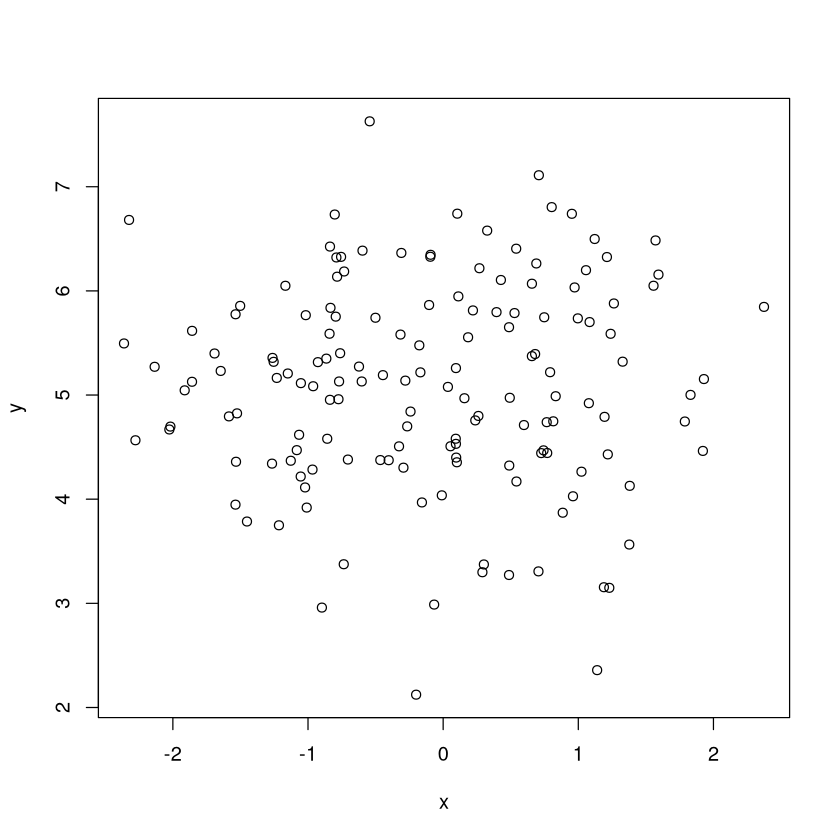

In [25]:
# eq 11: mostrar que el coeficiente de correlación es igual al coseno de similitud
# para los vectores centrados x0, y0. Usar la funcion cor(x,y) nativa de R.

cosine_sim <- function(x, y) {
  # obtener el producto punto
  dot_xy <- dot_prod(x, y)
  # obtener la norma L2
  norm_x <- norm(x, type = "2")
  norm_y <- norm(y, type = "2")
  dot_xy / (norm_x * norm_y) |> as.numeric()
}

set.seed(89)
x <- rnorm(150)
y <- rnorm(150, 5)
plot(x, y)
# centrar vectores
x0 <- center(x)
y0 <- center(y)

# cat(
#   "cos theta = ",
#   cosine_sim(x0, y0) |> round(6),
#   "\n",
#   "     rho = ",
#   cor(x, y) |> round(6)
# )
cat(
  sprintf(
    "cos theta: %0.6f\n      rho: %0.6f", cosine_sim(x0, y0), cor(x, y)
  )
)

Las propiedades (1) y (2) son fáciles de verificar numéricamente.

[1] "La correlación es de -0.003"


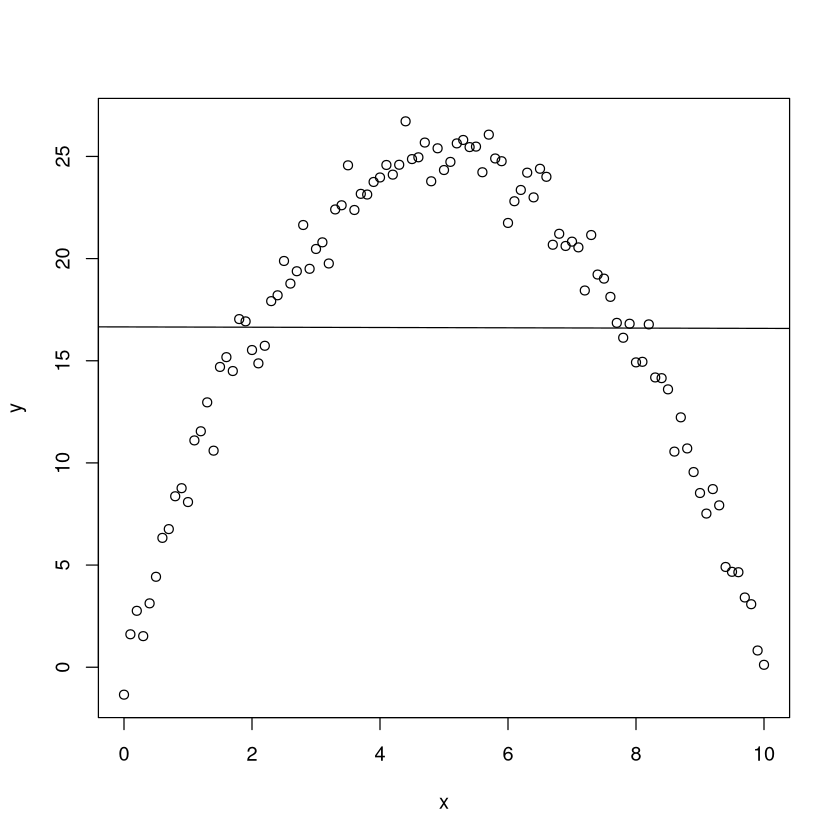

In [34]:
# rho solo mide dependencia lineal, no dependencia en general
fun_quadratic <- function(x) {
  xmax <- max(x)
  x*(xmax - x) + rnorm(length(x), 0, 0.1*xmax)
}
set.seed(456)
x <- seq(0, 10, 0.1)
y <- fun_quadratic(x)
plot(x, y)
abline(lm(y ~ x))
print(
  sprintf(
    'La correlación es de %0.3f', cor(x,y)
  )
)

**Off topic**: si $\rho$ no sirve para medir dependencia no lineal, ¿qué podemos usar?

Para medir dependencia *no lineal* existen alternativas, como la información mutua o la correlación de la distancia.

Para calcular la información mutua instalamos el paquete `infotheo` usando `install.packages('infotheo')`, y para correlación de la distancia instalamos `energy` de la misma manera.

In [36]:
# cargamos los paquetes
library(infotheo)
library(energy)
set.seed(456)
x <- seq(0, 10, 0.1)
y <- fun_quadratic(x)
# crear df para discretizar en bins
df_raw <- data.frame(x = x, y = y)
# cantidad de bines recomendado la raíz cuadrada de N
df_discretized <- discretize(X = df_raw, nbins = sqrt(NROW(df_raw)))
# calcular la información mutua
mut_info <- multiinformation(df_discretized, method = "mm")
# calcular la correlación de la distancia
cor_dist <- dcor(x, y)

cat(
  sprintf(
    "MultInf: %0.3f\nCorDist: %0.3f\nAmbas diferente de 0",
    mut_info, cor_dist
  )
)

MultInf: 1.221
CorDist: 0.488
Ambas diferente de 0

In [45]:
# invariante a transformaciones lineales
x <- seq(0, 10, 0.1)
set.seed(456)
y <- x + rnorm(length(x), 1, 2)
original_rho <- cor(x, y)
# multiplicar x por 2, sumar 3 a y
transformed_rho <- cor(x * 2, y + 3)
cat(
  sprintf(
    " OriginalRho: %0.3f\nLineTransRho: %0.3f",
    original_rho, transformed_rho
  )
)

 OriginalRho: 0.823
LineTransRho: 0.823

### 1.1.2. Covarianza multivariada

#### Datos multivariados

Los datos multivariados surgen cuando, para investigar algún fenóomeno o proceso, se seleccionan $p\geq 1$ *variables* o características para medir. Todos los valores se miden para una misma *unidad observacional* (individuo, objeto, proceso, máquina, etc.). Esas variables son llamadas *dimensiones*.

El análisis multivariado tiene como objeto el análisis y entendimiento de datos en varias dimensiones. Partimos de un arreglo $\textbf{X} \in \mathbb{R}^p$.

Denotamos como $x_{jk}$ a la $k$ variable (columna) medida en la $j$ observación (fila). Cada $x_{j}$ tiene $p$ dimensiones (o variables/columnas). 

$$
\begin{array}{c|cccccc}
& \text{Variable } 1  & \text{Variable } 2  & \dots & \text{Variable } k & \dots  & \text{Variable } p \\ \hline
\text{Ob }1 & {x}_{11} & {x}_{12} & \dots & x_{1k}  & \dots & {x}_{1p} \\
\text{Ob } 2 & {x}_{21} & {x}_{22} & \dots & x_{2k}  & \dots & {x}_{2p}\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\text{Ob } j & {x}_{j1} & {x}_{j2} & \dots & x_{jk}  & \dots & {x}_{jp} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\text{Ob } n & {x}_{n1} & {x}_{n2} & \dots & x_{nk}  & \dots & {x}_{np}
\end{array}{}
$$

**Ejemplo:**

Una selección de 4 recibos de una librería se obtuvieron para evaluar la venta de libros. Cada recibo tenía el número de libros vendidos y la cantidad de cada venta. Sea la primera variable la vanta en dólares y la segunda el número de libros. Podemos considerar el número correspondiente de recibos como cuatro mediciones de dos variables. Los datos en forma tabular serían 

$$
\begin{array}{c | c c}
      & \text{Variable } 1 \ (\text{dólares}) & \text{Variable } 2 \ (n\text{ libros}) \\ 
  \hline
  \text{ítem }1 & 42 & 4\\ 
  \text{ítem }2 &  52 & 5\\ 
  \text{ítem }3 &  48 & 4\\
  \text{ítem }4 &  58&  3\\
  \hline
\end{array}
$$

En notación matricial

$$
  \textbf{X} = \begin{bmatrix}
    42 & 4\\
    52 & 5\\
    48 & 4\\
    58 & 3\\
  \end{bmatrix}
$$

---
###  

La covarianza entre todos los elementos es una matriz

$$
  \Sigma = \begin{bmatrix}
  \sigma_{X_1X_2} & \dots & \sigma_{X_1X_p} \\
  \vdots & \ddots & \vdots \\
  \sigma_{X_pX_p} & \dots & \sigma_{X_pX_p}
  \end{bmatrix}
$$
